In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon.zip"

In [3]:
!unzip "/content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon.zip" -d "/content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/"


Archive:  /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon.zip
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test/acai/images (2).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test/acai/images (16).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: /content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAma

In [4]:
test_dir = "/content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/test"
train_dir = "/content/drive/MyDrive/AI-Shivkumar/Week5/FruitinAmazon_unzipped/FruitinAmazon/train"

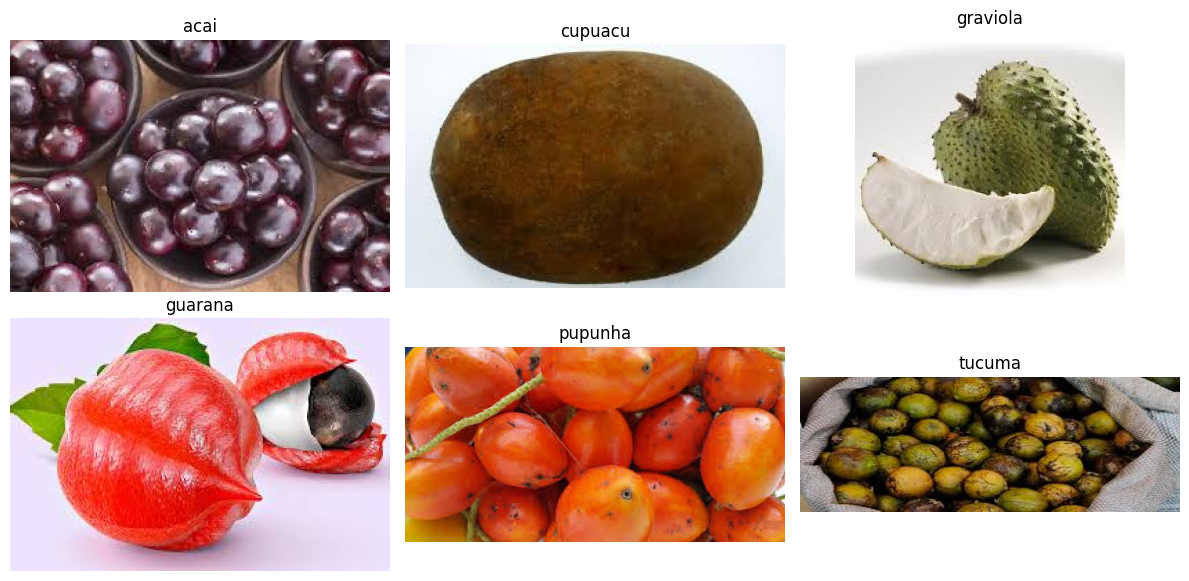

In [5]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Get class names (each subdirectory is a class)
class_names = sorted(os.listdir(train_dir))

# Select one random image from each class
sample_images = []
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_name = random.choice(os.listdir(class_path))  # Pick a random image
    image_path = os.path.join(class_path, image_name)
    sample_images.append((image_path, class_name))

# Display images in a grid
fig, axes = plt.subplots(2, len(sample_images) // 2, figsize=(12, 6))
axes = axes.flatten()

for i, (img_path, class_name) in enumerate(sample_images):  # Corrected unpacking
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [6]:
# Check and remove corrupted images
corrupted_images = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Check if image is valid
        except (IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


In [7]:
import tensorflow as tf
# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
model = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")  # Output layer based on class count
])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled successfully!")


Model compiled successfully!


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[checkpoint, early_stopping]
)

print("Model training complete!")


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.1453 - loss: 2.2342
Epoch 1: val_loss improved from inf to 1.86624, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1437 - loss: 2.2916 - val_accuracy: 0.0000e+00 - val_loss: 1.8662
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.3206 - loss: 1.7459
Epoch 2: val_loss improved from 1.86624 to 1.68500, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - accuracy: 0.3168 - loss: 1.7489 - val_accuracy: 0.0000e+00 - val_loss: 1.6850
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.2338 - loss: 1.7761
Epoch 3: val_loss improved from 1.68500 to 1.64628, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2413 - loss: 1.7718 - val_accuracy: 0.7222 - val_loss: 1.6463
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.4259 - loss: 1.7083
Epoch 4: val_loss improved from 1.64628 to 1.59139, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4201 - loss: 1.7060 - val_accuracy: 0.6667 - val_loss: 1.5914
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5197 - loss: 1.5907
Epoch 5: val_loss improved from 1.59139 to 1.58802, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5217 - loss: 1.5863 - val_accuracy: 0.1667 - val_loss: 1.5880
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.3553 - loss: 1.4666
Epoch 6: val_loss improved from 1.58802 to 1.26944, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 769ms/step - accuracy: 0.3533 - loss: 1.4640 - val_accuracy: 0.6667 - val_loss: 1.2694
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.5949 - loss: 1.1930
Epoch 7: val_loss improved from 1.26944 to 1.00269, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 651ms/step - accuracy: 0.5955 - loss: 1.1930 - val_accuracy: 0.8889 - val_loss: 1.0027
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.8310 - loss: 0.9402
Epoch 8: val_loss did not improve from 1.00269
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 598ms/step - accuracy: 0.8247 - loss: 0.9409 - val_accuracy: 0.6667 - val_loss: 1.0708
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.7211 - loss: 0.7691
Epoch 9: val_loss improved from 1.00269 to 0.59609, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.7144 - loss: 0.7737 - val_accuracy: 0.8333 - val_loss: 0.5961
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.8704 - loss: 0.5142
Epoch 10: val_loss did not improve from 0.59609
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 803ms/step - accuracy: 0.8681 - loss: 0.5193 - val_accuracy: 0.3889 - val_loss: 1.5399
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.8194 - loss: 0.5188
Epoch 11: val_loss did not improve from 0.59609
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 747ms/step - accuracy: 0.8229 - loss: 0.5103 - val_accuracy: 0.8333 - val_loss: 0.6394
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9196 - loss: 0.3645
Epoch 12: val_loss improved from 0.59609 to 0.53167, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - accuracy: 0.9223 - loss: 0.3597 - val_accuracy: 0.8333 - val_loss: 0.5317
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9601 - loss: 0.2348
Epoch 13: val_loss did not improve from 0.53167
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step - accuracy: 0.9596 - loss: 0.2356 - val_accuracy: 0.7778 - val_loss: 0.6386
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 1.0000 - loss: 0.1651
Epoch 14: val_loss did not improve from 0.53167
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 1.0000 - loss: 0.1610 - val_accuracy: 0.8333 - val_loss: 0.6346
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9902 - loss: 0.1404
Epoch 15: val_loss improved from 0.53167 to 0.48875, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - accuracy: 0.9891 - loss: 0.1394 - val_accuracy: 0.8333 - val_loss: 0.4888
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 1.0000 - loss: 0.0624
Epoch 16: val_loss improved from 0.48875 to 0.38978, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step - accuracy: 1.0000 - loss: 0.0611 - val_accuracy: 0.8889 - val_loss: 0.3898
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.9902 - loss: 0.0738
Epoch 17: val_loss improved from 0.38978 to 0.29041, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 823ms/step - accuracy: 0.9891 - loss: 0.0738 - val_accuracy: 0.8889 - val_loss: 0.2904
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 1.0000 - loss: 0.0306
Epoch 18: val_loss did not improve from 0.29041
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 1.0000 - loss: 0.0304 - val_accuracy: 0.7778 - val_loss: 0.4907
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 1.0000 - loss: 0.0202
Epoch 19: val_loss did not improve from 0.29041
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 524ms/step - accuracy: 1.0000 - loss: 0.0207 - val_accuracy: 0.7778 - val_loss: 0.5346
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 1.0000 - loss: 0.0143
Epoch 20: val_loss did not improve from 0.29041
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.8333 - val_loss: 0.4307
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 1.0000 - loss: 0.0105
Epoch 21: val_loss did not improve from 0.29041
3/3 

**Evaluate the Model**

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8889 - loss: 0.2904
Test Accuracy: 0.8889


**Save and Load the Model**

In [12]:
# Save the trained model
model.save("cnn_model.h5")
print("Model saved successfully!")

# Load the saved model
loaded_model = keras.models.load_model("cnn_model.h5")
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!


**Predictions and Classification Report**

In [13]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels and predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)

# Get unique classes in y_true
unique_classes = np.unique(y_true)

# Filter target_names to match the unique classes
filtered_target_names = [class_names[i] for i in unique_classes]

# Generate classification report
report = classification_report(
    y_true,
    y_pred,
    target_names=filtered_target_names,
    labels=unique_classes,  # Align labels with target_names
    output_dict=False       # Output as a formatted string
)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
              precision    recall  f1-score   support

     pupunha       1.00      0.67      0.80         3
      tucuma       1.00      0.93      0.97        15

   micro avg       1.00      0.89      0.94        18
   macro avg       1.00      0.80      0.88        18
weighted avg       1.00      0.89      0.94        18



** Visualization**


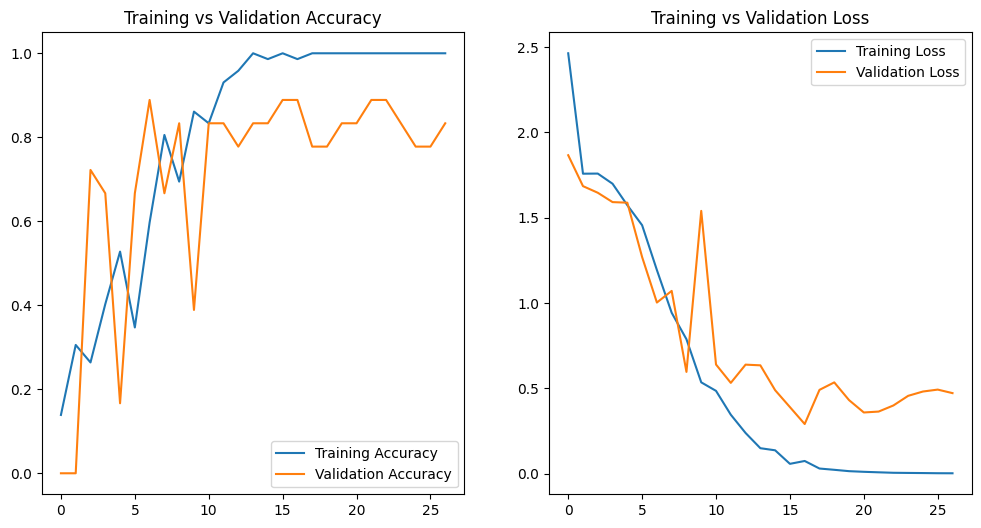

In [14]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

